In [23]:
# need this for interactive plots in jupyter notebooks
%matplotlib widget 
import os # for file path manipulations
import yaml # for reading yaml files (i.e. config file?)
import time # for timing code execution and sleep functions
import numpy as np 
import sys # access and modify python runtime env. (sys.path)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from pathlib import Path 

sys.path.append('../')
from geecs_python_api.controls.interface import GeecsDatabase
from geecs_python_api.controls.devices.geecs_device import GeecsDevice



In [24]:
# set the experiment info for the GeecsDevice class
GeecsDevice.exp_info = GeecsDatabase.collect_exp_info("Bella")

# define the device name 
camera = GeecsDevice('CAM-PL1-TapeDrivePointing')

exposure = camera.get('exposure')
print(exposure)

print(camera.state)

# example of writing to a device parameter
camera.set('exposure', 0.1)

print(camera.get('MaxCounts'))


0.1
{'fresh': False, 'shot number': None, 'GEECS device error': False, 'Device alive on instantiation': True, 'exposure': 0.1}
821.0


Live Plot Stopped


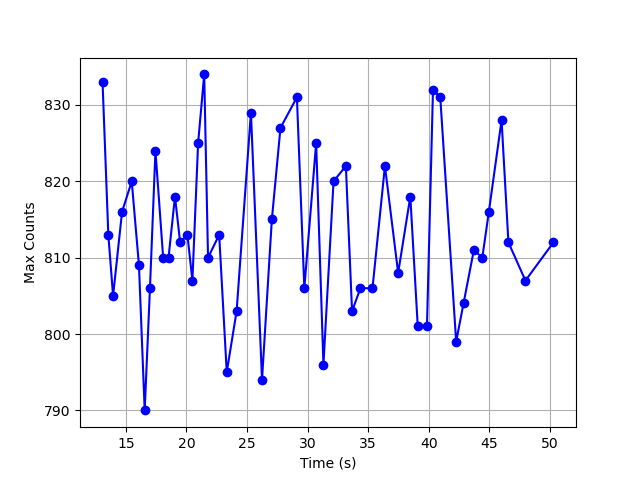

In [32]:
fig, ax = plt.subplots()
x, y = [] , []
line, = ax.plot([],[], 'o-',color='blue')
start_time = time.time()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Max Counts')
ax.grid()
try:

    while True:
        current_time = time.time() - start_time
        max_counts = camera.get('MaxCounts')

        x.append(current_time)
        y.append(max_counts)

        if len(x) > 50:
            x.pop(0)
            y.pop(0)

        line.set_data(x, y)
        ax.relim()
        ax.autoscale_view()

        clear_output(wait=True)
        display(fig)

        time.sleep(0.01)

except KeyboardInterrupt:
    print("Live Plot Stopped")